# IBM Data Science Final Capstone Project 
### Restaurant Recommendations for University of Toronto Students

## Introduction

The University of Toronto (UofT) is regarded as one of the most highly ranked school in all of Canada, placing first in all of Canada and top 20 in the world according to the prestigious *Times Higher Education* [1]. Being such a highly regarded institution, it is clear why many students in Toronto and across the world take the leap to study here and proudly wear their UofT sweaters and hoodies! The University of Toronto has 3 campuses across Toronto (St. George, Scarborough, Mississauga) where the most popular campus is St. George, located in the heart of Downtown Toronto. 

During my studies at the St. George campus, I found myself often asking what I want to have for lunch and what to do after I complete my exams. Even as a Toronto native myself, I found myself being confused with the sheer number of restaurants and venues located so close by! I find myself asking this question, as well as many of my peers when I ask what they want to eat for lunch. It is nice to have variety and have a nice pace of change every so often, but many people like to stick to their one favourite spot because of the fear of spending money on bad food (the worst feeling!). How can students reliably choose restaurants worthwhile while studying in Downtown Toronto? For those studying abroad and new to the area, what are some highly recommended places for them to eat from? 

## Business Problem

For this project, I would like to create a guide that can help freshmen's make healthy and delicious changes to their diets while studying at the University of Toronto. After all, a statistic of 8480 undergraduates have joined the University of Toronto St. George campus during the Fall 2019-20 semester alone. Accounting with the fact that over 23000 international students [2], it can be very hard for freshman and international students to navigate through Downtown Toronto and happily experiment with new foods. **The goal of the guide is to be able to tell students at the University of Toronto (St. George campus) which restaurants are best to eat at in the Downtown area, categorized by their food type.**

## Data

To perform the analysis to make the recommendation for students, I will need the following information:  
1. Geo-coordinates of Downtown Toronto. Will need coordinates to pass to the Foursquare API so it knows where to search.
2. Top venues in Downtown Toronto. Return the venue's name, location, type of cuisine, and number of likes

## Data Acquisition

To acquire the data necessary, I will use the following methods: 
1. Geo-coordinates of UofT will be obtained using the Geocoder API via Google service 
We can confirm and be precise by searching the coordinates online. 
2. The top venues in Downtown Toronto will be obtained using Foursquare through an API. 
Through the API, we can extract DT venue's names, ID, location, category, and number of likes

## Methodology

To accomplish this task, we first have to call and extract the data from the Foursquare API. 
Once our data is cleaned, formatted and reviewed for missing values, we can apply our machine learning algorithm: **k-means clustering algorithm** in order to group restaurants in Downtown Toronto in a few clusters so that people in the UofT campus can easily locate the best restaurants according to the type of cuisine they are feeling, and the can easily locate where to find it.

### Import Libraries
Import all the modules we'll need in Python in order to run the code

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Find the geodata for the University of Toronto
Searching on the UofT website, we get its formal address and will use that as our location [3]

In [2]:
# Searching on the UofT website, we get its formal address and will use that as our location 
address = "27 King's College Cir, ON"

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of University of Toronto - St.George Campus are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of University of Toronto - St.George Campus are 43.6607225, -79.39591980951508.


Show a map to see if the location is correct

In [3]:
# create map of New York using latitude and longitude values
map_dt = folium.Map(location=[latitude, longitude], zoom_start=15)
map_dt

The map when having a high zoom level (over 15+) centers and frames Downtown Toronto accurately! The coordinates of (43.6607225, -79.39591980951508) are good!

### Define Foursquare Credentials and Version to use its API

In [4]:
CLIENT_ID = 'BYKO4WMTNTMEHY5BPK5HX3GY0APPJ1XH2P4UEC0FVPSH1AQX' # your Foursquare ID
CLIENT_SECRET = 'GQSJCGIHVOTFEUGKPPUHSNU1UVD1FC5AMJBFSTOLRDZD03EV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: BYKO4WMTNTMEHY5BPK5HX3GY0APPJ1XH2P4UEC0FVPSH1AQX
CLIENT_SECRET:GQSJCGIHVOTFEUGKPPUHSNU1UVD1FC5AMJBFSTOLRDZD03EV


### Get the top 100 venues in The University of Toronto
##### Create the GET request URL
##### Include an explict search query = food so that we only get restaurants or venues where we can eat

In [5]:
# Limit number of venues shown 
LIMIT = 100

# Radius of 1km from given location
radius = 1000

# Create an explicit search query for food such that no recreational venues appear
search_query = 'food'
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.\
format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

#### Send the GET request to Foursquare API and store its RETURNED JSON values to a variable

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f07b6445bd87379b312f5ca'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'University of Toronto',
  'headerFullLocation': 'University of Toronto, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'query': 'food',
  'totalResults': 186,
  'suggestedBounds': {'ne': {'lat': 43.66972250900001,
    'lng': -79.38350247343162},
   'sw': {'lat': 43.65172249099999, 'lng': -79.40833714559854}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4aeb711ef964a52017c221e3',
       'name': 'Vegetarian Haven',
       'location': {'address': '17 Baldwin St',
        'lat': 43.656016028357094,
        'lng': -79.3927577742003,
        'labeledLatLngs': [

Create a function that can extract the values we want from the JSON file from Foursquare

In [7]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Clean the JSON and structure it into a Pandas dataframe. 
From the JSON file extract the venues name, id, categories, latitude, and longitude

In [8]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.id','venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\abcdk\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,id,categories,lat,lng
0,Vegetarian Haven,4aeb711ef964a52017c221e3,Vegetarian / Vegan Restaurant,43.656016,-79.392758
1,Yasu,5362c366498e602fbe1db395,Japanese Restaurant,43.662837,-79.403217
2,Rasa,527d450111d25050de4ea0d8,Restaurant,43.662757,-79.403988
3,Blackbird Baking Co,535163cf498ea10a3b9582b5,Bakery,43.654764,-79.400566
4,Seven Lives - Tacos y Mariscos,50427a03e4b08d9f5931f593,Mexican Restaurant,43.654418,-79.400545


In [9]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Review the categories
By having the search query explictly stated to look for venues containing food, we do not have to parse or remove and entries from this list

In [10]:
nearby_venues['categories'].unique()

array(['Vegetarian / Vegan Restaurant', 'Japanese Restaurant',
       'Restaurant', 'Bakery', 'Mexican Restaurant', 'Doner Restaurant',
       'Pizza Place', 'Café', 'Thai Restaurant', 'Caribbean Restaurant',
       'Vietnamese Restaurant', 'Italian Restaurant',
       'Comfort Food Restaurant', 'Belgian Restaurant',
       'Sushi Restaurant', 'Burrito Place', 'Noodle House',
       'Hot Dog Joint', 'Burger Joint', 'Bagel Shop', 'Donut Shop',
       'Chinese Restaurant', 'Breakfast Spot', 'Snack Place',
       'French Restaurant', 'Fish & Chips Shop', 'Dumpling Restaurant',
       'Middle Eastern Restaurant', 'Creperie', 'Persian Restaurant',
       'Fried Chicken Joint', 'Ramen Restaurant',
       'Latin American Restaurant', 'Empanada Restaurant',
       'Arepa Restaurant', 'Bistro', 'Diner', 'Steakhouse',
       'Indian Restaurant', 'Sandwich Place'], dtype=object)

# Major Assumption for the Model
The goal of this project is to recommend students a good place to eat on campus such that they do not have to worry or be skeptical if the food will be good. My assumption for this model is that the number of likes, also known as the number of Foursquare users who actively recommended the venue is the sole criteria for the restaurant's quality. The assumption I am making is that the more likes a restaurant receives, the greater the quality experience students will have during their meal

## Now that we have our venues closeby, we want to gather each venue's number of likes
Since our first GET request was an explore, it did not include each venue's ratings. We need to send the venue's ID to request their number of ratings. Thus, we send another GET request using each venue ID as a parameter input

In [11]:
# Convert the dataframe column of ID to a list format
ratings_id = nearby_venues['id'].tolist()

Using the id list, we can create a for loop to create a call and request the number of likes for each specific restaurant

In [12]:
# Create and initialize our lists to store our values from each GET request

links = []
numlikes = []

for id in ratings_id:
    url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(id, CLIENT_ID, CLIENT_SECRET, VERSION)
    links.append(url)

for site in links:
    result = requests.get(site).json()
    likes = result['response']['likes']['count']
    numlikes.append(likes)
len(numlikes)

100

Verify if the size of our likes list is the same as the number of resturants we have! 

In [13]:
if len(numlikes) == len(ratings_id):
    print("Math checks out!",len(numlikes),"entries")
else:
    print("Some data must have been lost when retriving the number of likes")

Math checks out! 100 entries


### Add the columns of numLikes to our dataframe

In [14]:
nearby_venues['likes'] = numlikes

nearby_venues.head()

,name,id,categories,lat,lng,likes
0,Vegetarian Haven,4aeb711ef964a52017c221e3,Vegetarian / Vegan Restaurant,43.656016,-79.392758,58
1,Yasu,5362c366498e602fbe1db395,Japanese Restaurant,43.662837,-79.403217,46
2,Rasa,527d450111d25050de4ea0d8,Restaurant,43.662757,-79.403988,79
3,Blackbird Baking Co,535163cf498ea10a3b9582b5,Bakery,43.654764,-79.400566,62
4,Seven Lives - Tacos y Mariscos,50427a03e4b08d9f5931f593,Mexican Restaurant,43.654418,-79.400545,299


## Data Formatting for Machine Learning
Now that we have all of the information we need: Name, ID, categories, location (lat/long), and their number of likes, we can proceed to setup our dataframe for the k-means algorithm

In [15]:
# Backup to our initial dataframe so we can create dummy variables freely! 
uoft_venues = nearby_venues.copy()
uoft_venues.head()

,name,id,categories,lat,lng,likes
0,Vegetarian Haven,4aeb711ef964a52017c221e3,Vegetarian / Vegan Restaurant,43.656016,-79.392758,58
1,Yasu,5362c366498e602fbe1db395,Japanese Restaurant,43.662837,-79.403217,46
2,Rasa,527d450111d25050de4ea0d8,Restaurant,43.662757,-79.403988,79
3,Blackbird Baking Co,535163cf498ea10a3b9582b5,Bakery,43.654764,-79.400566,62
4,Seven Lives - Tacos y Mariscos,50427a03e4b08d9f5931f593,Mexican Restaurant,43.654418,-79.400545,299


#### Data Visualization
**Since the number of likes a restaurant has is our primary metric for quality, let's analyze the distribution for their likes**

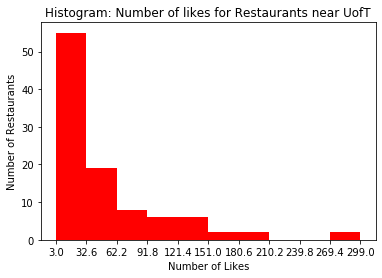

In [16]:
# Import the pyplot module to plot the graph 
import matplotlib.pyplot as plt

# Create proper bins edges for the graph 
Count, bin_edges = np.histogram(uoft_venues['likes'])
uoft_venues['likes'].plot(kind = 'hist', xticks = bin_edges, color='red')

# Create a title, x-axis, and y-axis 
plt.title("Histogram: Number of likes for Restaurants near UofT")
plt.xlabel("Number of Likes")
plt.ylabel("Number of Restaurants")
plt.show()

From our histogram, we can see that many restaurants have received less than 33 likes on Foursquare. To contrast, there's a small number of restaurants who have over 269 total likes on Foursquare. We can review these statistics more carefully so we can make some claims about a good restaurant

In [17]:
low = np.percentile(uoft_venues['likes'], 25)
med = np.percentile(uoft_venues['likes'], 50)
high = np.percentile(uoft_venues['likes'], 75)

print("25%: {} | 50%: {} | 75%: {}".format(low,med,high))

25%: 14.75 | 50%: 30.5 | 75%: 64.25


Using the percentile as the basis for categorizing and our metric for quality, we will set labels for each restaurant indicating how it rates according to its number of likes.

This label will be called popularity category

In [18]:
def popularity(df):
    if df['likes'] <= low:
        return "Not Enough Recommendations"
    if df["likes"] <= med:
        return "Below Average Recommendations"
    if df["likes"] <= high:
        return "Above Average Recommendations"
    if df["likes"] > high:
        return "Very Recommended"
    
uoft_venues['Popularity'] = uoft_venues.apply(popularity, axis=1)
uoft_venues.head()

,name,id,categories,lat,lng,likes,Popularity
0,Vegetarian Haven,4aeb711ef964a52017c221e3,Vegetarian / Vegan Restaurant,43.656016,-79.392758,58,Above Average Recommendations
1,Yasu,5362c366498e602fbe1db395,Japanese Restaurant,43.662837,-79.403217,46,Above Average Recommendations
2,Rasa,527d450111d25050de4ea0d8,Restaurant,43.662757,-79.403988,79,Very Recommended
3,Blackbird Baking Co,535163cf498ea10a3b9582b5,Bakery,43.654764,-79.400566,62,Above Average Recommendations
4,Seven Lives - Tacos y Mariscos,50427a03e4b08d9f5931f593,Mexican Restaurant,43.654418,-79.400545,299,Very Recommended


### Create Combined Categories
Since there are so many categories specified on Foursquare, I would like to combine categories based on their continent of origin so that we have a more consise recommendation for students. 

In [19]:
uoft_venues['categories'].unique()

array(['Vegetarian / Vegan Restaurant', 'Japanese Restaurant',
       'Restaurant', 'Bakery', 'Mexican Restaurant', 'Doner Restaurant',
       'Pizza Place', 'Café', 'Thai Restaurant', 'Caribbean Restaurant',
       'Vietnamese Restaurant', 'Italian Restaurant',
       'Comfort Food Restaurant', 'Belgian Restaurant',
       'Sushi Restaurant', 'Burrito Place', 'Noodle House',
       'Hot Dog Joint', 'Burger Joint', 'Bagel Shop', 'Donut Shop',
       'Chinese Restaurant', 'Breakfast Spot', 'Snack Place',
       'French Restaurant', 'Fish & Chips Shop', 'Dumpling Restaurant',
       'Middle Eastern Restaurant', 'Creperie', 'Persian Restaurant',
       'Fried Chicken Joint', 'Ramen Restaurant',
       'Latin American Restaurant', 'Empanada Restaurant',
       'Arepa Restaurant', 'Bistro', 'Diner', 'Steakhouse',
       'Indian Restaurant', 'Sandwich Place'], dtype=object)

In [20]:
asian_food = ['Japanese Restaurant','Thai Restaurant','Vietnamese Restaurant','Sushi Restaurant',\
              'Noodle House','Chinese Restaurant','Dumpling Restaurant','Ramen Restaurant','Indian Restaurant']
latin_food = ['Mexican Restaurant', 'Burrito Place','Latin American Restaurant','Empanada Restaurant',\
             'Arepa Restaurant']
med_food = ['Doner Restaurant','Middle Eastern Restaurant','Persian Restaurant','Sandwich Place']
euro_food = ['Belgian Restaurant','French Restaurant','Fish & Chips Shop','Creperie','Diner']
italian_food = ['Pizza Place','Italian Restaurant','Bistro','Steakhouse']
american_food = ['Comfort Food Restaurant','Burger Joint','Hot Dog Joint','Fried Chicken Joint','Caribbean Restaurant']
snacks_food = ['Bakery','Café','Bagel Shop', 'Donut Shop','Snack Place']
other_food = ['Vegetarian / Vegan Restaurant','Restaurant','Breakfast Spot']
              
def new_category(df):
    if df['categories'] in asian_food:
        return "Asian_Food"
    if df['categories'] in latin_food:
        return "Latin_Food"
    if df['categories'] in med_food:
        return "Med_Food"
    if df['categories'] in euro_food:
        return "Euro_Food"
    if df['categories'] in italian_food:
        return "Italian_Food"
    if df['categories'] in american_food:
        return "American_Food"
    if df['categories'] in snacks_food:
        return "Snacks_Food"
    if df['categories'] in other_food:
        return "Other_Food"
    
uoft_venues['Combined Categories'] = uoft_venues.apply(new_category, axis =1)
uoft_venues.head()

,name,id,categories,lat,lng,likes,Popularity,Combined Categories
0,Vegetarian Haven,4aeb711ef964a52017c221e3,Vegetarian / Vegan Restaurant,43.656016,-79.392758,58,Above Average Recommendations,Other_Food
1,Yasu,5362c366498e602fbe1db395,Japanese Restaurant,43.662837,-79.403217,46,Above Average Recommendations,Asian_Food
2,Rasa,527d450111d25050de4ea0d8,Restaurant,43.662757,-79.403988,79,Very Recommended,Other_Food
3,Blackbird Baking Co,535163cf498ea10a3b9582b5,Bakery,43.654764,-79.400566,62,Above Average Recommendations,Snacks_Food
4,Seven Lives - Tacos y Mariscos,50427a03e4b08d9f5931f593,Mexican Restaurant,43.654418,-79.400545,299,Very Recommended,Latin_Food


### Create dummy variables for categories
Now that we have populated our dataframe with the information we require, we can go ahead and setup our dataframe to be used for clustering

In [21]:
# one hot encoding
uoft_onehot = pd.get_dummies(uoft_venues[['Combined Categories','Popularity']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
uoft_onehot['Name'] = uoft_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [uoft_onehot.columns[-1]] + list(uoft_onehot.columns[:-1])
uoft_onehot = uoft_onehot[fixed_columns]

uoft_onehot.head()

,Name,American_Food,Asian_Food,Euro_Food,Italian_Food,Latin_Food,Med_Food,Other_Food,Snacks_Food,Above Average Recommendations,Below Average Recommendations,Not Enough Recommendations,Very Recommended
0,Vegetarian Haven,0,0,0,0,0,0,1,0,1,0,0,0
1,Yasu,0,1,0,0,0,0,0,0,1,0,0,0
2,Rasa,0,0,0,0,0,0,1,0,0,0,0,1
3,Blackbird Baking Co,0,0,0,0,0,0,0,1,1,0,0,0
4,Seven Lives - Tacos y Mariscos,0,0,0,0,1,0,0,0,0,0,0,1


In [22]:
uoft_venues.drop('Combined Categories', axis = 1, inplace = True)
uoft_venues.head()

,name,id,categories,lat,lng,likes,Popularity
0,Vegetarian Haven,4aeb711ef964a52017c221e3,Vegetarian / Vegan Restaurant,43.656016,-79.392758,58,Above Average Recommendations
1,Yasu,5362c366498e602fbe1db395,Japanese Restaurant,43.662837,-79.403217,46,Above Average Recommendations
2,Rasa,527d450111d25050de4ea0d8,Restaurant,43.662757,-79.403988,79,Very Recommended
3,Blackbird Baking Co,535163cf498ea10a3b9582b5,Bakery,43.654764,-79.400566,62,Above Average Recommendations
4,Seven Lives - Tacos y Mariscos,50427a03e4b08d9f5931f593,Mexican Restaurant,43.654418,-79.400545,299,Very Recommended


In [23]:
# Trial, see if I should split it by category or not

dt_onehot = pd.get_dummies(uoft_venues[['categories','Popularity']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dt_onehot['Name'] = uoft_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [dt_onehot.columns[-1]] + list(dt_onehot.columns[:-1])
dt_onehot = dt_onehot[fixed_columns]

dt_onehot.head()

,Name,Arepa Restaurant,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Breakfast Spot,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Empanada Restaurant,Fish & Chips Shop,French Restaurant,Fried Chicken Joint,Hot Dog Joint,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Noodle House,Persian Restaurant,Pizza Place,Ramen Restaurant,Restaurant,Sandwich Place,Snack Place,Steakhouse,Sushi Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Above Average Recommendations,Below Average Recommendations,Not Enough Recommendations,Very Recommended
0,Vegetarian Haven,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,Yasu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Rasa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,Blackbird Baking Co,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Seven Lives - Tacos y Mariscos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Run the K-Means Clustering Algorithm
Now that we have all the columns we need to analyze and use the K-Means algorithim, we have to determine the amount of clusters to bunch our data into (determine optimal k value)
We can do this by evaluating a k-value between 1 to 10 with a silhoutte score

**Found through experimenting, the dataframe structure with combined categories did not end up very well**

**Will use the default categories for the algorithm**

In [24]:
# Drop the name so we only have continous values in the dataset
cluster_df = dt_onehot.drop('Name', axis=1)

# Import library method for Silhoutte Score 
from sklearn.metrics import silhouette_samples, silhouette_score

k_val = []
s_score = []

for kclusters in range (2, 10):
    # run k-means clustering
    kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=0).fit_predict(cluster_df)
    
    # Get the score for the inter-cluster and intra-cluster distance
    score = silhouette_score(cluster_df, kmeans)
    
    # Append and stores scores and k-value in a list 
    k_val.append(kclusters)
    s_score.append(score)

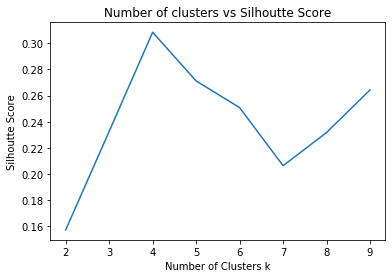

In [25]:
# Plot the s_score to see how many clusters we should fit out model with 

plt.plot(k_val,s_score)
plt.title("Number of clusters vs Silhoutte Score")
plt.xlabel("Number of Clusters k")
plt.ylabel("Silhoutte Score")
plt.xticks(k_val)
plt.show()

From the graph above, we can see that k = 4 is the optimal number of clusters

## Plot Using K = 4 in the K-Means algorithm

In [26]:
k_clusters = 4

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 1, 2, 1, 1, 3, 2, 3, 3])

In [27]:
# Add the algorithm's labels back into our dataframe
dt_venues = uoft_venues.copy()
dt_venues.drop("id",axis = 1,inplace = True)
dt_venues['Cluster Label'] = kmeans.labels_
dt_venues.head()

,name,categories,lat,lng,likes,Popularity,Cluster Label
0,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758,58,Above Average Recommendations,2
1,Yasu,Japanese Restaurant,43.662837,-79.403217,46,Above Average Recommendations,2
2,Rasa,Restaurant,43.662757,-79.403988,79,Very Recommended,1
3,Blackbird Baking Co,Bakery,43.654764,-79.400566,62,Above Average Recommendations,2
4,Seven Lives - Tacos y Mariscos,Mexican Restaurant,43.654418,-79.400545,299,Very Recommended,1


## Visualize Clusters on Follium

In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dt_venues['lat'], dt_venues['lng'], dt_venues['name'], dt_venues['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters
We can examine the cluster individually to identify similar characteristics and traits the algorithm has identified for us

### Cluster #1
We can sort the dataframe for the restaurants cluster labelled 0, and review the distributino of resaurant types, as well as their likes rating

In [29]:
cluster_one = dt_venues.loc[dt_venues['Cluster Label']==0]
cluster_one

,name,categories,lat,lng,likes,Popularity,Cluster Label
15,Sambuca Grill,Italian Restaurant,43.656110,-79.392946,10,Not Enough Recommendations,0
20,Anh Dao,Vietnamese Restaurant,43.656217,-79.399265,13,Not Enough Recommendations,0
24,Saigon Lotus Restaurant,Vietnamese Restaurant,43.654311,-79.399225,9,Not Enough Recommendations,0
27,Livelihood Cafe,Café,43.655821,-79.402629,11,Not Enough Recommendations,0
38,Xam Yu,Chinese Restaurant,43.655108,-79.398882,8,Not Enough Recommendations,0
52,Innis Cafe,Café,43.665401,-79.399715,6,Not Enough Recommendations,0
54,Somethin' 2 Talk About,Middle Eastern Restaurant,43.658395,-79.385338,6,Not Enough Recommendations,0
55,Dipped,Donut Shop,43.654920,-79.400154,9,Not Enough Recommendations,0
58,T-Swirl Crepe,Creperie,43.663452,-79.384125,12,Not Enough Recommendations,0
64,Flock Rotisserie + Greens,Fried Chicken Joint,43.659167,-79.389475,6,Not Enough Recommendations,0


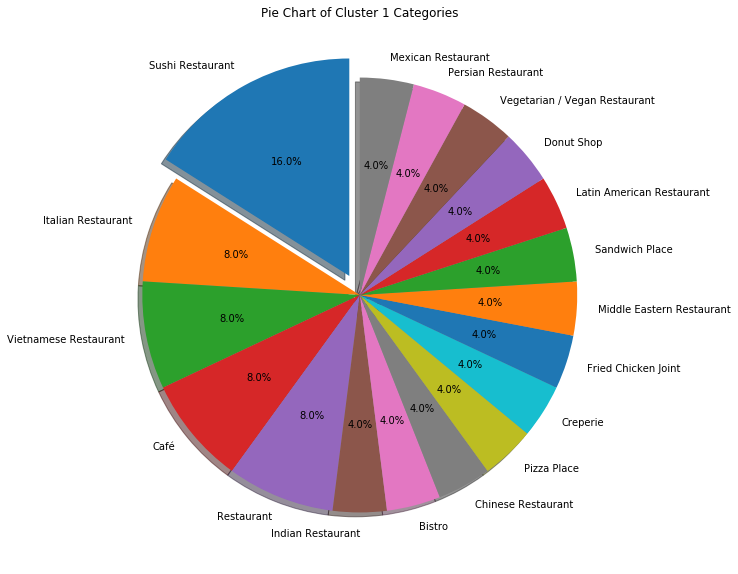

In [30]:
c1_categories = cluster_one['categories'].value_counts()

# Make a pie chart 
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
c1_categories.plot(kind = 'pie',autopct='%1.1f%%', explode = explode, startangle = 90, shadow = True, figsize=(10,10))
plt.title("Pie Chart of Cluster 1 Categories")
plt.ylabel("")
plt.show()

We can see that in cluster 1, it's comprised mostly of Italian and Latin restaurants!

Lets obtain a distribution of the ratings from this cluster! 

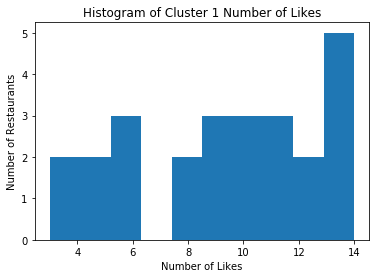

In [31]:
# pop1 = cluster_one['Popularity'].value_counts()
cluster_one['likes'].plot(kind = "hist")
plt.title("Histogram of Cluster 1 Number of Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Number of Restaurants")
plt.show()

From cluster 1, we can see it comprises of a variety of restaurant types, but has a lot of sushi restaurants. 
Overall, restaurants from cluster 1 are not recommended by users of Foursquare enough. 

## Cluster 2

In [39]:
cluster_two = dt_venues.loc[dt_venues['Cluster Label']==1]
cluster_two

,name,categories,lat,lng,likes,Popularity,Cluster Label
2,Rasa,Restaurant,43.662757,-79.403988,79,Very Recommended,1
4,Seven Lives - Tacos y Mariscos,Mexican Restaurant,43.654418,-79.400545,299,Very Recommended,1
5,Otto's Berlin Döner,Doner Restaurant,43.656387,-79.402788,121,Very Recommended,1
10,The Moonbean Cafe,Café,43.654147,-79.400182,150,Very Recommended,1
11,El Trompo,Mexican Restaurant,43.655832,-79.402561,99,Very Recommended,1
13,Hibiscus,Vegetarian / Vegan Restaurant,43.655454,-79.402439,89,Very Recommended,1
14,Jimmy's Coffee,Café,43.654493,-79.401311,200,Very Recommended,1
17,Voodoo Child,Café,43.656958,-79.405460,110,Very Recommended,1
18,Café Pamenar,Café,43.656678,-79.402822,149,Very Recommended,1
25,Fresh on Bloor,Vegetarian / Vegan Restaurant,43.666755,-79.403491,294,Very Recommended,1


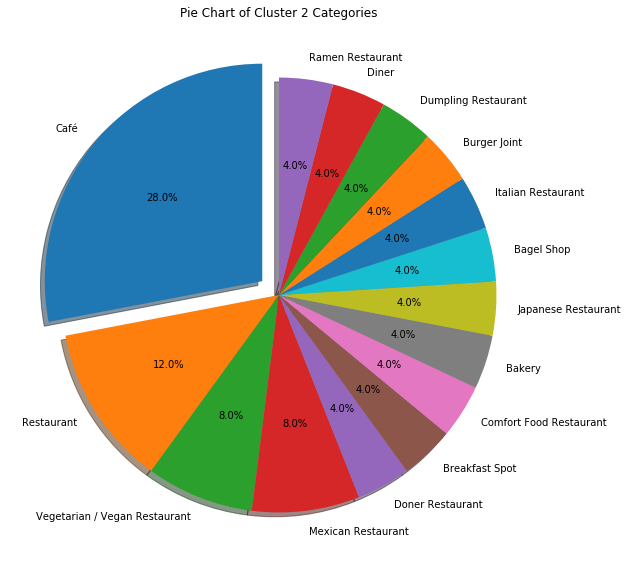

In [32]:
c2_categories = cluster_two['categories'].value_counts()

# Make a pie chart 
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
c2_categories.plot(kind = 'pie',autopct='%1.1f%%', explode = explode, startangle = 90, shadow = True, figsize=(10,10))
plt.title("Pie Chart of Cluster 2 Categories")
plt.ylabel("")
plt.show()

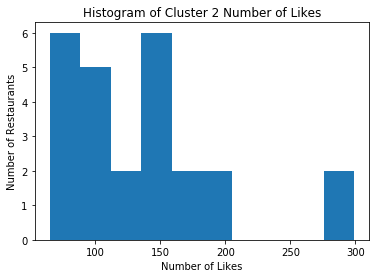

In [33]:
# pop2 = cluster_two['Popularity'].value_counts()
cluster_two['likes'].plot(kind = "hist")
plt.title("Histogram of Cluster 2 Number of Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Number of Restaurants")
plt.show()

Cluster 2 is populated with the popular and well-liked respinses from Foursquare users. It comprises mostly of cafes in Downtown Toronto

## Cluster 3

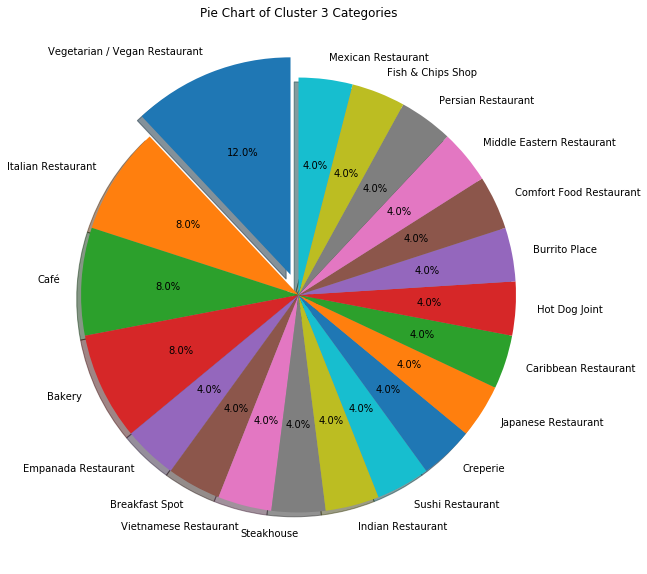

In [34]:
cluster_three = dt_venues.loc[dt_venues['Cluster Label']==2]
c3_categories = cluster_three['categories'].value_counts()

# Make a pie chart 
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
c3_categories.plot(kind = 'pie',autopct='%1.1f%%', explode = explode, startangle = 90, shadow = True, figsize=(10,10))
plt.title("Pie Chart of Cluster 3 Categories")
plt.ylabel("")
plt.show()

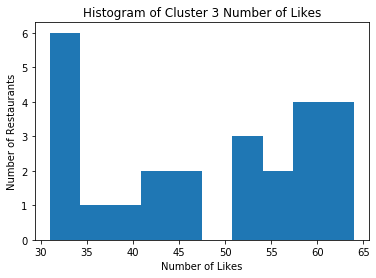

In [35]:
# pop3 = cluster_three['Popularity'].value_counts()
cluster_three['likes'].plot(kind = "hist")
plt.title("Histogram of Cluster 3 Number of Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Number of Restaurants")
plt.show()

With cluster 3, we can see that vegetarian restaurants are the most popular in this cluster. This cluster has fair number of likes for every restaurant (above average)

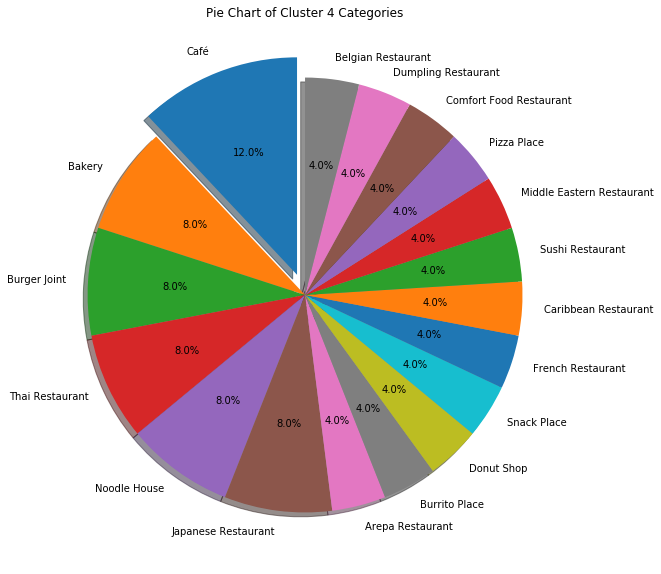

In [36]:
cluster_four = dt_venues.loc[dt_venues['Cluster Label']==3]
c4_categories = cluster_four['categories'].value_counts()

# Make a pie chart 
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
c4_categories.plot(kind = 'pie',autopct='%1.1f%%', explode = explode, startangle = 90, shadow = True, figsize=(10,10))
plt.title("Pie Chart of Cluster 4 Categories")
plt.ylabel("")
plt.show()

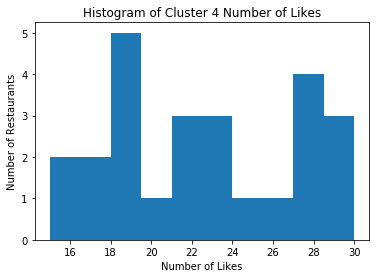

In [37]:
# pop4 = cluster_four['Popularity'].value_counts()
cluster_four['likes'].plot(kind = "hist")
plt.title("Histogram of Cluster 4 Number of Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Number of Restaurants")
plt.show()

# Conclusion
By looking at the cluster data and a histogram of their Popularity ratings, it is very clear how the K-means algorithm clustered each restaurant. We chose k = 4 because its silhoutte score was the highest, most likely because there were 4 popularity values that I had allocated each restaurant to fall under. With the clusters, we can clearly identify which restaurants are highly recommended by Foursquares users, and which ones are not. 

From the data, we can see that resturants under cluster 2 and (all are heavily recommended) and restaurants under cluster 3 (above average recommendations) 

Since every restaurant from cluster 2 have the best number of likes, these restaurants should be our goto recommendations when a student is looking for somewhere to eat! To ensure, we can get restaurants from cluster 3 as well if the student is looking for a different type of cuisine!

## If a students wants a place to eat, check out this dataframe grouped by category!

In [38]:
recommend = dt_venues.loc[(dt_venues['Cluster Label']==1) | (dt_venues['Cluster Label']==2)]
recommend = recommend.groupby("categories").max()

recommend.columns = ["Name","Latitude","Longitude","Likes","Popularity","Cluster label"]
recommend.index.name = "Categories"
recommend

,Name,Latitude,Longitude,Likes,Popularity,Cluster label
Categories,,,,,,
Bagel Shop,Nu Bügel,43.655547,-79.402528,79,Very Recommended,1
Bakery,Wanda's Pie in the Sky,43.656163,-79.400566,136,Very Recommended,2
Breakfast Spot,Karine's,43.657002,-79.390743,162,Very Recommended,2
Burger Joint,The Burgernator,43.655642,-79.402440,118,Very Recommended,1
Burrito Place,Burrito Bandidos,43.662962,-79.383956,57,Above Average Recommendations,2
Café,Voodoo Child,43.667963,-79.388873,200,Very Recommended,2
Caribbean Restaurant,Rasta Pasta,43.654207,-79.400469,58,Above Average Recommendations,2
Comfort Food Restaurant,The Dirty Bird Chicken + Waffles,43.655109,-79.400674,70,Very Recommended,2
Creperie,Crêpes à GoGo,43.666609,-79.404061,52,Above Average Recommendations,2


# References
[1] https://www.utoronto.ca/news/u-t-ranked-first-canada-among-world-s-top-20-universities-times-higher-education 
https://www.utoronto.ca/about-u-of-t/quick-facts 

[2] https://www.utoronto.ca/about-u-of-t/quick-facts

[3] https://www.utoronto.ca/contacts